In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
a = yf.download('BTC-USD')
a

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-06-17,26328.679688,26769.394531,26174.492188,26510.675781,26510.675781,11090276850
2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9565695129
2023-06-19,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,12826986222


In [ ]:
#Filtering
a.reset_index(inplace=True)
a = a[['Date', 'Adj Close']]
a

,Date,Adj Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3195,2023-06-17,26510.675781
3196,2023-06-18,26336.212891
3197,2023-06-19,26851.029297
3198,2023-06-20,28327.488281


In [ ]:
a.columns = ['ds','y']

In [ ]:
a

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3195,2023-06-17,26510.675781
3196,2023-06-18,26336.212891
3197,2023-06-19,26851.029297
3198,2023-06-20,28327.488281


In [ ]:
model = Prophet()

In [ ]:
model.fit(a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwnc59dx/8egkor6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwnc59dx/u03ys8xy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18002', 'data', 'file=/tmp/tmpqwnc59dx/8egkor6g.json', 'init=/tmp/tmpqwnc59dx/u03ys8xy.json', 'output', 'file=/tmp/tmpqwnc59dx/prophet_modelax0iij6z/prophet_model-20230621105404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:54:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
a.tail()

,ds,y
3195,2023-06-17,26510.675781
3196,2023-06-18,26336.212891
3197,2023-06-19,26851.029297
3198,2023-06-20,28327.488281
3199,2023-06-21,28867.468750


In [ ]:
#Prediction
future_pred = model.make_future_dataframe(periods = 50)

In [ ]:
future_pred.tail()

,ds
3245,2023-08-06
3246,2023-08-07
3247,2023-08-08
3248,2023-08-09
3249,2023-08-10


In [ ]:
predictions = model.predict(future_pred)
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3245,2023-08-06,11930.478532,4643.787694,17119.907136,11835.381862,12037.944921,-1148.135077,-1148.135077,-1148.135077,-1.012381,-1.012381,-1.012381,-1147.122696,-1147.122696,-1147.122696,0.0,0.0,0.0,10782.343454
3246,2023-08-07,11877.975577,4760.864801,16857.831691,11771.100752,12001.592256,-1071.665924,-1071.665924,-1071.665924,10.299050,10.299050,10.299050,-1081.964974,-1081.964974,-1081.964974,0.0,0.0,0.0,10806.309653
3247,2023-08-08,11825.472623,4716.451720,16861.133109,11708.138379,11964.971470,-1012.191860,-1012.191860,-1012.191860,7.540544,7.540544,7.540544,-1019.732404,-1019.732404,-1019.732404,0.0,0.0,0.0,10813.280763
3248,2023-08-09,11772.969668,4809.316031,17218.448966,11641.712223,11924.910504,-920.109291,-920.109291,-920.109291,40.626068,40.626068,40.626068,-960.735359,-960.735359,-960.735359,0.0,0.0,0.0,10852.860377
3249,2023-08-10,11720.466714,4001.747513,17227.911814,11584.460384,11887.646697,-942.086470,-942.086470,-942.086470,-36.771152,-36.771152,-36.771152,-905.315318,-905.315318,-905.315318,0.0,0.0,0.0,10778.380244


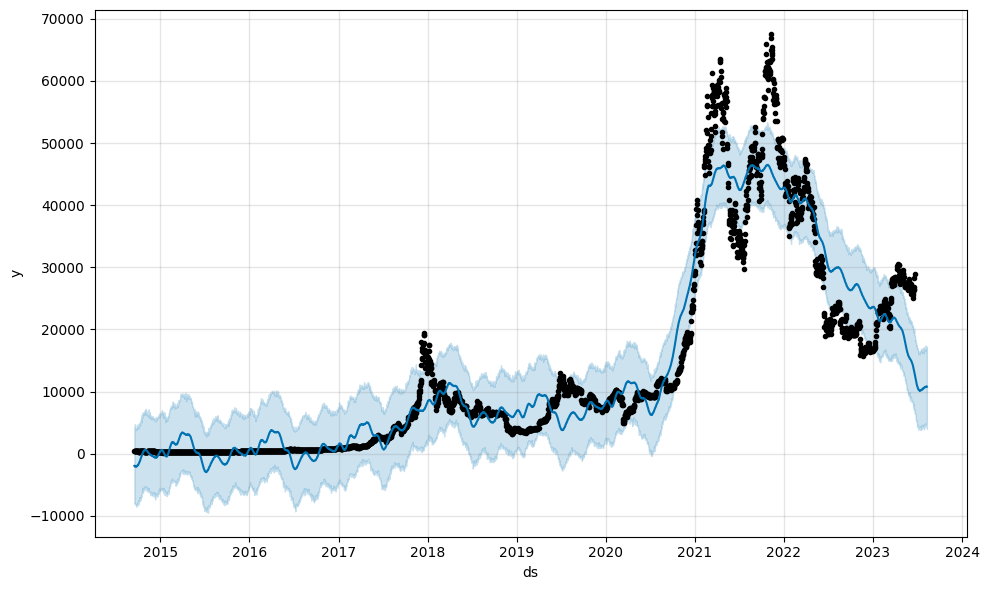

In [ ]:
fig = model.plot(predictions)

In [ ]:
from prophet.plot import plot_plotly
plot_plotly(model,predictions)

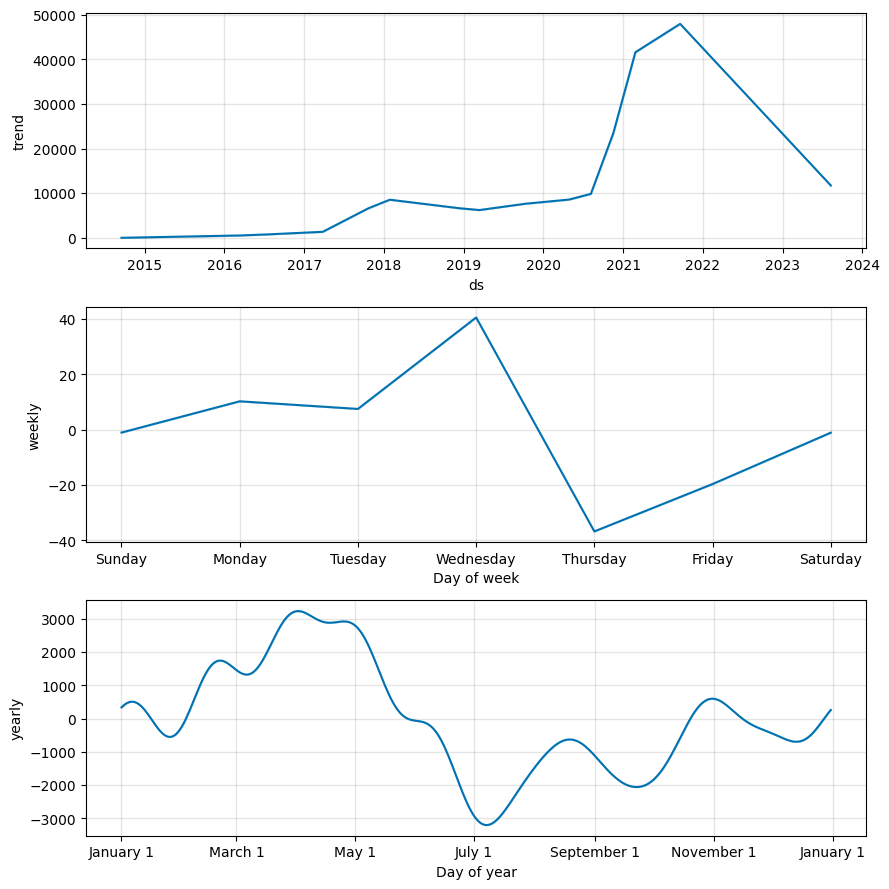

In [ ]:
fig2 = model.plot_components(predictions)

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
a_cv = cross_validation(model,horizon = '5 days')

INFO:prophet:Making 112 forecasts with cutoffs between 2015-09-26 00:00:00 and 2023-05-02 00:00:00


  0%|          | 0/112 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwnc59dx/buu4jzc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwnc59dx/4rooerfw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47606', 'data', 'file=/tmp/tmpqwnc59dx/buu4jzc6.json', 'init=/tmp/tmpqwnc59dx/4rooerfw.json', 'output', 'file=/tmp/tmpqwnc59dx/prophet_modele9y0ynk3/prophet_model-20230621110608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwnc59dx/cmse7cn8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwnc59dx/feva__lo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
a_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
5595,2023-06-17,9171.852963,3292.315602,15102.650028,26510.675781,2023-05-02
5596,2023-06-18,9049.085513,3436.196397,14977.765411,26336.212891,2023-05-02
5597,2023-06-19,8940.202781,3280.133453,14917.088318,26851.029297,2023-05-02
5598,2023-06-20,8805.228690,3366.200868,15056.093527,28327.488281,2023-05-02
5599,2023-06-21,8688.683170,2623.605707,14687.233380,28867.468750,2023-05-02


In [ ]:
from prophet.diagnostics import performance_metrics
a_performance = performance_metrics(a_cv)
a_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days,7.367337e+07,8583.319243,5026.494220,0.253337,0.185565,0.242739,0.328571
1,6 days,7.405720e+07,8605.649389,5054.763494,0.258503,0.190479,0.247796,0.319643
2,7 days,7.520559e+07,8672.115666,5111.103556,0.264665,0.200326,0.253841,0.314286
3,8 days,7.635910e+07,8738.369344,5155.879915,0.270695,0.201142,0.259678,0.314286
4,9 days,7.759169e+07,8808.614655,5189.823450,0.275314,0.204897,0.264239,0.310714
5,10 days,7.951944e+07,8917.367154,5259.317440,0.280000,0.209974,0.269315,0.298214
6,11 days,8.283735e+07,9101.502693,5388.489620,0.286251,0.220249,0.275712,0.289286
7,12 days,8.616729e+07,9282.633796,5503.570396,0.290765,0.228593,0.280900,0.280357
8,13 days,8.852653e+07,9408.853706,5597.120918,0.295559,0.235526,0.285993,0.269643
9,14 days,9.119195e+07,9549.447736,5694.041071,0.300318,0.239716,0.291454,0.257143


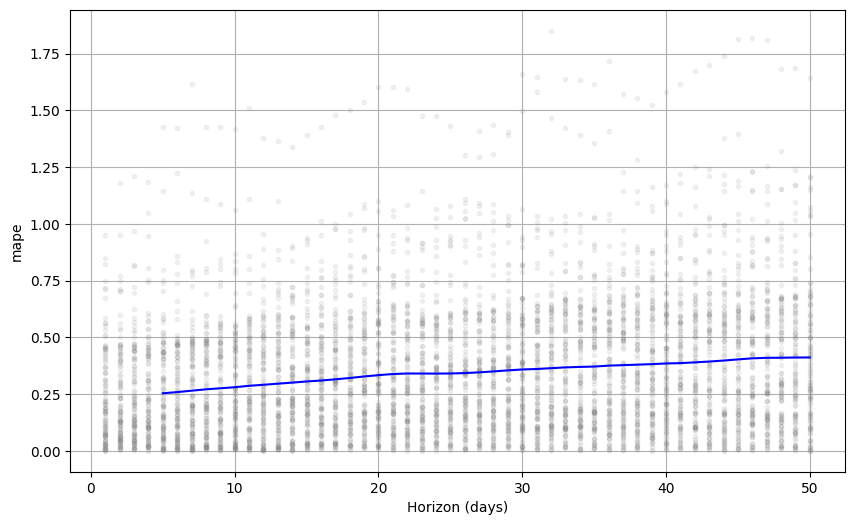

In [ ]:
from prophet import plot
fig3 = plot.plot_cross_validation_metric(a_cv, metric = 'mape')

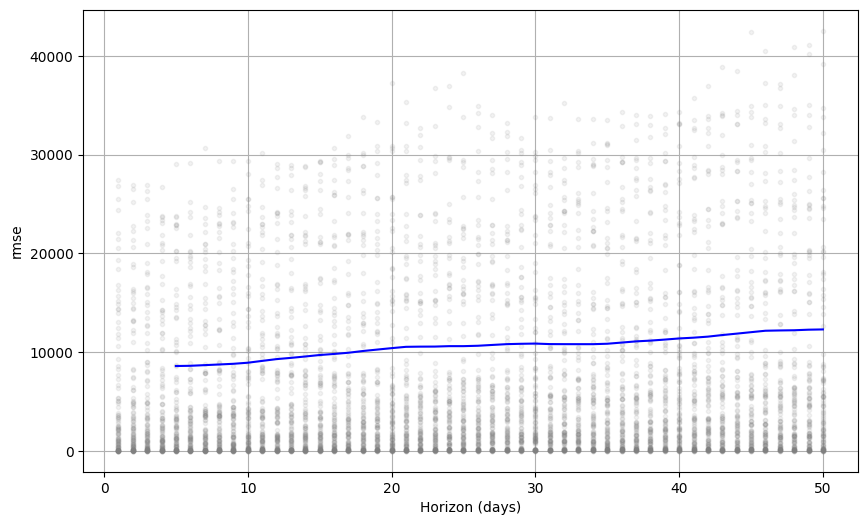

In [ ]:
fig4 = plot.plot_cross_validation_metric(a_cv, metric = 'rmse')

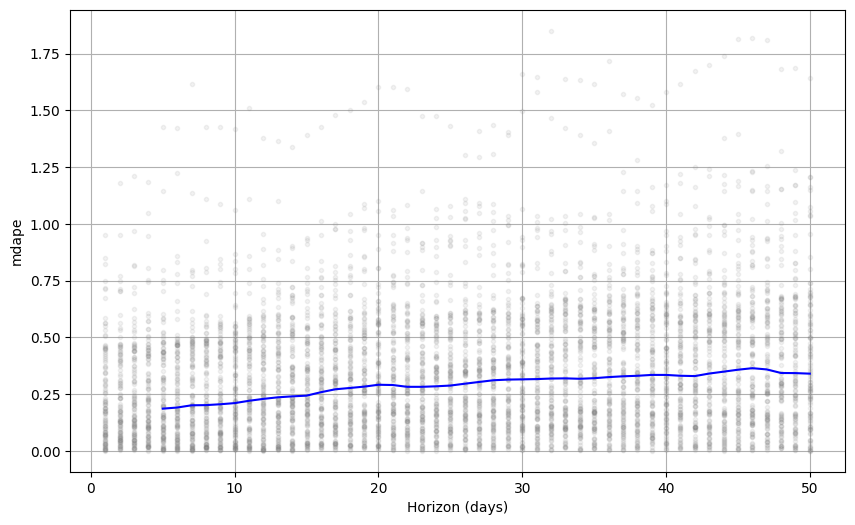

In [ ]:
fig5 = plot.plot_cross_validation_metric(a_cv, metric = 'mdape')

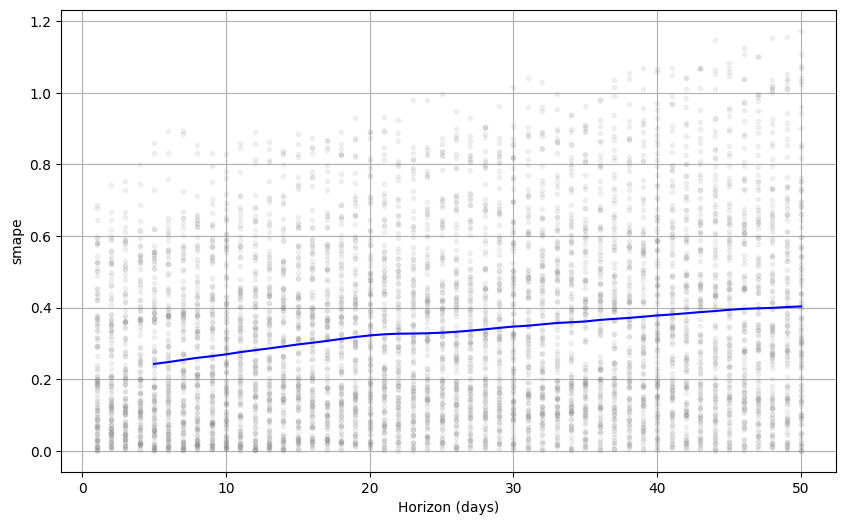

In [ ]:
fig6 = plot.plot_cross_validation_metric(a_cv, metric = 'smape')

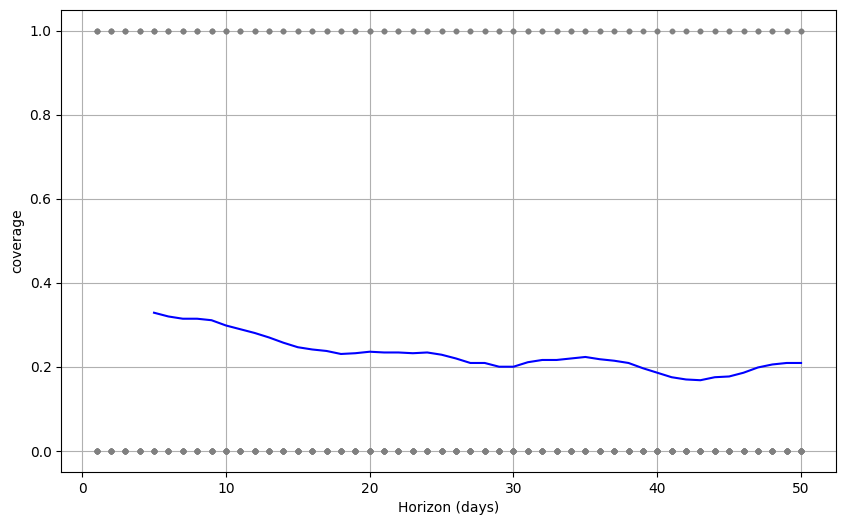

In [ ]:
fig7 = plot.plot_cross_validation_metric(a_cv, metric = 'coverage')